In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [250]:
#importing dataset
house_price_dataset =pd.read_csv("C:/Projects/Machine Learning/Code/Data-Set/HousingData.csv")
print(house_price_dataset.columns)
print(house_price_dataset)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
        CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273     21.0  391.99    NaN  22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273     21.0  393.45   

In [251]:
#data preprocessing
print(house_price_dataset.shape)
house_price_dataset.info()
house_price_dataset.isnull().sum()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [252]:
#Handling Missing values
house_price_dataset.dropna(inplace=True)

In [253]:
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [254]:
#mathematical info of the datafame
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

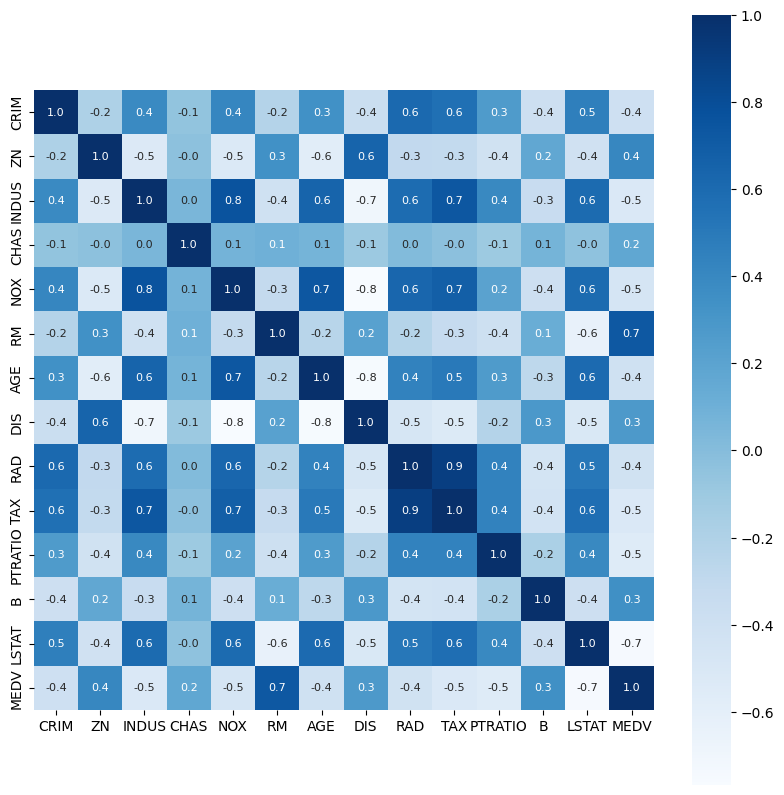

In [255]:
correlation=house_price_dataset.corr()
#print(correlation)

#Heatmap for representing the corelation of the data 
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
##here 
#cbar= Colour Bar should be present in the right side
#square = True means that all the values should be inside the square
#fmt= how many float values(decimal places) shoould be present
#annot= annotations that are given in the side (lables)
#annot_kws is used to set the size of the text
# cmap is used to change the colour of the heatmap


In [256]:
##Splitting the data into dependent(Input) and independent(Target/output)
X=house_price_dataset.iloc[:,0:13]
print(X)


        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...    3  222     18.7  394.63   2.94
5    0.02985   0.0   2.18   0.0  0.458  ...    3  222     18.7  394.12   5.21
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
499  0.17783   0.0   9.69   0.0  0.585  ...    6  391     19.2  395.77  15.10
500  0.22438   0.0   9.69   0.0  0.585  ...    6  391     19.2  396.90  14.33
502  0.04527   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...    1  273     21.0  393.45   6.48

[394 rows x 13 columns]


In [257]:
Y=house_price_dataset.iloc[:,-1]
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64


In [258]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,)#random_state = 2
print(x_train)

         CRIM    ZN  INDUS  CHAS     NOX  ...  RAD  TAX  PTRATIO       B  LSTAT
32    1.38799   0.0   8.14   0.0  0.5380  ...    4  307     21.0  232.60  27.71
235   0.33045   0.0   6.20   0.0  0.5070  ...    8  307     17.4  376.75  10.88
494   0.27957   0.0   9.69   0.0  0.5850  ...    6  391     19.2  396.90  13.59
464   7.83932   0.0  18.10   0.0  0.6550  ...   24  666     20.2  396.90  13.22
462   6.65492   0.0  18.10   0.0  0.7130  ...   24  666     20.2  396.90  13.99
..        ...   ...    ...   ...     ...  ...  ...  ...      ...     ...    ...
404  41.52920   0.0  18.10   0.0  0.6930  ...   24  666     20.2  329.46  27.38
231   0.46296   0.0   6.20   0.0  0.5040  ...    8  307     17.4  376.14   5.25
5     0.02985   0.0   2.18   0.0  0.4580  ...    3  222     18.7  394.12   5.21
248   0.16439  22.0   5.86   0.0  0.4310  ...    7  330     19.1  374.71   9.52
280   0.03578  20.0   3.33   0.0  0.4429  ...    5  216     14.9  387.31   3.76

[315 rows x 13 columns]


In [259]:
#loading model
model=XGBRegressor()

#Training the model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [260]:
#Training [Prediction on training data]

#accuracy
predictions=model.predict(x_test)
print(predictions)


[17.429735  19.102964  15.788253   9.0478945 15.264039  27.123703
 18.87353   44.85474   15.233276  23.696869  19.114277  24.420946
 34.148136  20.318642  11.680894  21.972984  19.279799   9.679587
 20.101112  12.7777195 26.144281   8.171962  18.953056  12.025354
 22.128922  19.336884  43.25285   16.611061  31.386654  29.2447
 17.419172  31.65673   21.303709  20.264954  21.575596  21.498606
 16.836834  11.682746  20.355507  14.278443  20.620588  34.775417
 13.212444  24.349024  20.904222  36.313164  27.684341  38.731556
 19.097387  23.64271   15.578684  14.448391  12.95258   22.779293
 20.459478  26.15393   15.274307  24.504028  35.067295   7.690984
 24.47493   19.61026    7.5641017 18.607367  32.34872   14.2669325
 17.180805  33.47648   26.323912  13.6546755 19.134062  13.147318
  9.492663  24.559597  15.127209  30.289242  29.720325   8.061732
 22.677423 ]


In [261]:
#Error Calculation
#r square error
accuracy=metrics.r2_score(y_test,predictions)##this will give the variance between the data and prediction
print(accuracy)

#mean absolution error
error=metrics.mean_absolute_error(y_test,predictions)#mean of difference between original and predictions
print(error)

0.8707774153233931
2.077056301696391


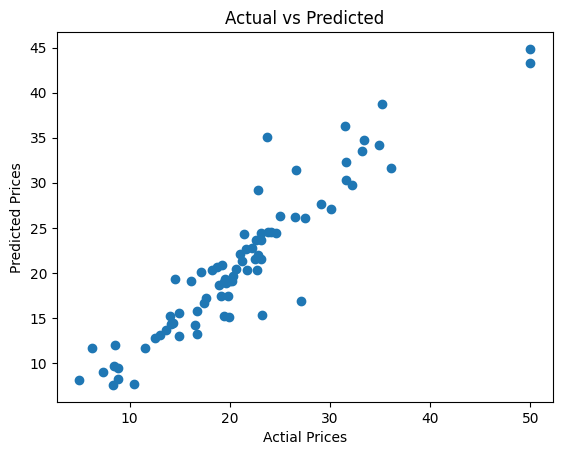

In [262]:
#visulalize the actual price with the predicted price
plt.scatter(y_test,predictions)
plt.xlabel("Actial Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()
